In [174]:
"""
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

from tensorflow import  keras
from tensorflow.keras import layers"""

import os, sys
import os.path
import numpy as np
import pandas as pd
import datetime 

#pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Test**

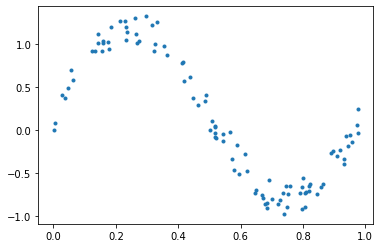

In [ ]:
N = 100
X = np.random.rand(N,1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N,1)
plt.plot(X,Y,'.')
plt.show()

In [ ]:
#  1-100-100-1
inputs = keras.Input(shape=(1,))
d1 = layers.Dense(100,activation='relu')
d2 = layers.Dense(100,activation='relu')
d3 = layers.Dense(1)
outputs = d3(d2(d1(inputs)))
model = keras.Model(inputs,outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),loss=keras.losses.MeanSquaredError())






NameError: ignored

In [ ]:
model.fit(X,Y,epochs=500)

In [ ]:
Z = model.predict(X)
plt.plot(X,Z,'.r')
plt.plot(X,Y,'.')
plt.show()

# Load Data

In [176]:
df = pd.read_excel("/content/drive/My Drive/Set50_2.xlsx",sep='\t')


In [211]:
df[30:40]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55920 entries, 0 to 55919
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     55920 non-null  object 
 1   SET50.Open    55920 non-null  float64
 2   SET50.High    55920 non-null  float64
 3   SET50.Low     55920 non-null  float64
 4   SET50.Close   55920 non-null  float64
 5   SMA(5)        55916 non-null  float64
 6   SMA(12)       55909 non-null  float64
 7   SMA(26)       55895 non-null  float64
 8   EMA(12)       55909 non-null  float64
 9   EMA(26)       55895 non-null  float64
 10  MACD          55895 non-null  float64
 11  MACD(10)      55886 non-null  float64
 12  Change        55919 non-null  float64
 13  Gain          26931 non-null  float64
 14  Loss          27233 non-null  float64
 15  AVG Gain(14)  55906 non-null  float64
 16  AVG Loss(14)  55906 non-null  float64
 17  RS            55836 non-null  float64
 18  RSI           55906 non-nu

# **Load Data from xlsx file**

In [ ]:
used_features = ['Timestamp','SMA(5)','SMA(12)','SMA(26)','MACD','MACD(10)','RSI','Money(5)']
stock = pd.read_excel("/content/drive/My Drive/Set50_2.xlsx", usecols = used_features)
#print(stock.shape)
stock[40:50]
stock.info()
for i in ["SMA(5)"]:
  stock[i] = stock[i].map(lambda x:x.replace("-",''))
  stock[i] = stock[i].astype(float)


In [ ]:
plt.title("SET50")
plt.xlabel('Timestamp')	
plt.ylabel('Closed')
plt.plot(df.OBL, df.OSL , 'ob')
plt.show()	


In [ ]:
"""stock.info()
stock.dtypes
stock['SMA(5)'] = stock['SMA(5)'].astype(float)"""

## **-------------Indicator-------------**




### Simple Moving Average

In [177]:
def sma(price_close,day):      
    result = price_close.rolling(window=day).mean()
    return result 

### MACD = Moving Average Convergence/Divergence

In [178]:
def macd( slow, fast):    
    result = slow-fast  
    return result

In [ ]:
df['SMA5'] = sma(df["SET50.Close"],5)
df['SMA12'] = sma(df["SET50.Close"],12)
df['SMA26'] = sma(df["SET50.Close"],26)

#df.drop(columns=['sma55'],inplace=True)
df["EMA12"] = df["EMA(12)"]


df.head(10)






## **features**

In [213]:
used_features = ['Timestamp','SET50.Open','SET50.Close','SET50.High','SET50.Low','SMA(5)','SMA(12)','SMA(26)','MACD','MACD(10)','RSI','Money','Money(5)']
dtn = pd.read_excel("/content/drive/My Drive/Set50_2.xlsx",sep='\t', usecols = used_features)
print(dtn.shape)
dtn.head(7)

(55920, 13)


,Timestamp,SET50.Open,SET50.High,SET50.Low,SET50.Close,SMA(5),SMA(12),SMA(26),MACD,MACD(10),RSI,Money,Money(5)
0,13/03/19 14:26:00,1081.38,1081.38,1081.38,1081.38,NaN,NaN,NaN,NaN,NaN,NaN,8324463.24,NaN
1,13/03/19 14:27:00,1080.28,1080.28,1079.86,1079.86,NaN,NaN,NaN,NaN,NaN,NaN,882245.62,NaN
2,13/03/19 14:28:00,1079.77,1081.50,1079.72,1081.50,NaN,NaN,NaN,NaN,NaN,NaN,3174202.50,NaN
3,13/03/19 14:29:00,1081.54,1081.54,1081.32,1081.32,NaN,NaN,NaN,NaN,NaN,NaN,101644.08,NaN
4,13/03/19 14:30:00,1081.38,1081.38,1081.37,1081.37,1081.086,NaN,NaN,NaN,NaN,NaN,2054603.00,2907431.688
5,13/03/19 14:31:00,1081.29,1081.70,1081.29,1081.66,1081.142,NaN,NaN,NaN,NaN,NaN,760406.98,1394620.436
6,13/03/19 14:32:00,1081.93,1081.93,1081.42,1081.42,1081.454,NaN,NaN,NaN,NaN,NaN,3602210.02,1938613.316


### Check for Null value and preprocessing data

In [216]:
for feature in used_features:
    if dtn[feature].isnull().values.any():
        print (feature)

In [217]:
for feature in ['SET50.Open','SET50.Close','SET50.High','SET50.Low','SMA(5)','SMA(12)','SMA(26)','MACD','MACD(10)','RSI','Money','Money(5)']:
    dtn[feature].fillna(dtn[feature].median(),inplace = True)

In [218]:
dtn.head(30)


,Timestamp,SET50.Open,SET50.High,SET50.Low,SET50.Close,SMA(5),SMA(12),SMA(26),MACD,MACD(10),RSI,Money,Money(5)
0,13/03/19 14:26:00,1081.38,1081.38,1081.38,1081.38,1046.945,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,8324463.24,3703497.300
1,13/03/19 14:27:00,1080.28,1080.28,1079.86,1079.86,1046.945,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,882245.62,3703497.300
2,13/03/19 14:28:00,1079.77,1081.50,1079.72,1081.50,1046.945,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,3174202.50,3703497.300
3,13/03/19 14:29:00,1081.54,1081.54,1081.32,1081.32,1046.945,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,101644.08,3703497.300
4,13/03/19 14:30:00,1081.38,1081.38,1081.37,1081.37,1081.086,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,2054603.00,2907431.688
5,13/03/19 14:31:00,1081.29,1081.70,1081.29,1081.66,1081.142,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,760406.98,1394620.436
6,13/03/19 14:32:00,1081.93,1081.93,1081.42,1081.42,1081.454,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,3602210.02,1938613.316
7,13/03/19 14:33:00,1081.65,1081.65,1080.90,1080.90,1081.334,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,6779404.80,2659653.776
8,13/03/19 14:34:00,1081.05,1081.27,1080.82,1081.01,1081.272,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,2077701.22,3054865.204
9,13/03/19 14:35:00,1080.82,1081.70,1080.82,1081.24,1081.246,1046.960833,1046.971154,-0.017384,-0.017957,49.783784,660637.64,2776072.132


## Condition
    1) หากมูลค่าตามราคาตลาดมีค่ามากกว่ามูลค่าตามราคาตลาดเฉลี่ยระยะเวลา 5วัน จะเข้าเงื่อนไขในกฎข้อ 2, 3 และ 4 ต่อไป เพื่อให้ความสนใจในกรณีการแลกเปลี่ยนซื้อขายที่มีขนาดกลางไปจนถึงขนาดใหญ่ และในกรณีที่มูลค่าตามตลาดในขณะนั้น มีค่านอ้ยกว่ามูลค่าตามตลาดเฉลี่ยระยะเวลา 5 วันหรือเกิดการแลกเปลี่ยนซื้อขายขนาดเล็ก ก็จะทำาการถือหลักทรัพย์นั้นไว้และไม่ทำ การขายหรือซ้ือเพิ่มในกรณีที่มีหลักทรัพย์นั้นในการครอบครอง
    2) หากราคาปิดของหลักทรัพย์มีค่ามากกว่าราคาปิดของหลักทรัพย์เฉลี่ยระยะเวลา 5วัน จะทำ การซ้ือหลักทรัพย์น้นัและในกรณีหากราคาปิดของหลักทรัพย์มีค่าน้อยกว่าราคาปิ ดของหลักทรัพย์เฉลี่ยระยะเวลา 5 วัน จะท าการขายหลักทรัพย์น้นั18
    3) หากค่า MACD เป็นบวก ซึ่งมีค่า EMA(12) มากกว่า EMA(26) แสดงว่า ทิศทางแนวโน้มของราคาหลักทรัพย์ และแรงส่งของราคาหลักทรัพย์ กำลังอยู่ในช่วงขาขึ้น จะทำ การขายหลักทรัพย์นั้น และในกรณีค่า MACD เป็นลบซึ่งมีค่า EMA(12)น้อยกว่า EMA(26) แสดงว่า ทิศทางแนวโน้มของราคาหลักทรัพย์และแรงส่งของราคาหลักทรัพย์กำลังอยู่ในช่วงขาลง และใน 2 กรณีที่กล่าวมาข้างต้น โอกาสที่ค่าMACD จะเปลี่ยนจากบวกเป็นลบหรือลบเป็นบวกเกิดข้ึนไดน้อ้ยมากหรืออาจเกิดได้ช้า ซึ่งราคาของหลักทรัพย์อาจจะตกหรือข้ึนไปมากแลว้ เพื่อเพิ่มโอกาสในการทา กา ไร ผูว้ิจยัจึงไดเ้พิ่มกฏยอ่ ยเขา้ไปว่า หากค่า MACD มีค่าเป็ นบวก และค่าMACD มากกว่า MACD เฉลี่ย ระยะเวลา 10 วนั จะทา การซ้ือหลักทรัพย์น้น ใน ักรณีหากค่า MACD มีค่าเป็ นบวกและค่า MACD น้อยกว่า MACD เฉลี่ยระยะเวลา10 วัน จะท าการขายหลักทรัพย์น้นั และในกรณีหากค่า MACD มีค่าเป็ นลบ จะท าการขายหลักทรัพย์น้นั
    4) หากค่า RSI น้อยกว่า 30 แสดงว่าหลักทรัพย์น้นัอาจมีแนวโนม้ ในการพลิกจากช่วงขาลงมาเป็ นช่วงขาข้ึนได้ และในกรณีหากค่า RSI มากกว่า 70 หลักทรัพย์น้นัอาจมีแนวโนม้ ในการพลิกจากช่วงขาข้ึนมาเป็นช่วงขาลงได้ผูว้ิจยัจึงคิดกฏว่า หากจะทาการซ้ือหลักทรัพย์น้นั ไดก้็ต่อเมอื่ ค่า RSI น้อยกว่า 70 และในกรณีจะขายหลักทรัพย์น้นั จะสามารถขายได้เมื่อค่า RSI มากกว่า 30จากเงื่อนไขที่กล่าวมาข้างต้น หากเข้าเงื่อนไขตามกฎข้อ1 คือ 



---

    มูลค่าตามราคาตลาดมีค่ามากกว่ามูลค่าตามราคาตลาดเฉลี่ยระยะเวลา 5 วัน จะสามารถสรุปการเพิ่มค่ากลุ่มแนวโนม้ของหลักทรัพย์ได้ดังนี้
    1) หากเงื่อนไขจากกฎข้อ 2, 3 และ 4 ท้้ง 3 ข้อ ตรงกบั เงื่อนไขการซ้ือ จะเพิ่มค่ากลุ่มแนวโน้มของหลักทรัพย์เป็นการแนะนำให้ซ้ือหลักทรัพย์น้้น ในวัดถัดไป
    2) หากเงื่อนไขจากกฎข้อ 2, 3และ 4 ท้งั 3ขอ้ ตรงกบั เงื่อนไขการขาย จะเพิ่มค่ากลุ่มแนวโน้มของหลักทรัพย์เป็ นการแนะน าให้ขายหลักทรัพย์น้นั ในวนัถดัไป
    3) หากเงื่อนไขจากกฎข้อ 2, 3 และ 4 ท้งั 3 ขอ้ ไม่ตรงเงื่อนไขซ้ือหรือเงื่อนไขขายท้งัหมด จะไม่กระทา การใดๆ หรือทา การถือหลักทรัพย์น้นั ไวใ้นกรณีที่มีหลักทรัพย์น้นัอยใู่ นการครอบครอง19และหากไม่เข้าเงื่อนไขตามกฎข้อ 1 คือ มูลค่าตามราคาตลาดมีค่าน้อยกว่ามูลค่าตามราคาตลาดเฉลี่ยระยะเวลา 5 วัน จะไม่กระท าการใดๆ หรือท าการถือหลักทรัพย์น้นั ไวใ้นกรณีที่มีหลักทรัพย์น้นัอยใู่ นการครอบครอง


In [258]:
def sel(money,money5):
  if money < money5:
      result = 'Stay'
  else:
      if close > close5:
         result = 'Buy'
      else:
          result = "Sell"
      if macd>=0.0:
          result = "Buy"
      else:
          result = "Sell"
      if rsi >30 and rsi <70:
          result = 'Buy'
      else:
          result = "Sell"
  return result
    

In [ ]:
plt.plot(dtn["SET50.Close"],dtn["SET50.Open"])

plt.title('SET50')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.show()



In [261]:
sel(dtn["Money"][2],dtn["Money(5)"][2])

'Stay'

# Train

In [266]:
def encode_mysignal(signal, predict="up"):
  if predict=="up":    
    signal[signal < 4] = 0 
    signal[signal == 4] = 1 # สนใจราคาขึ้นมากสุด 4 วันติดกัน

  elif predict=="down":
    signal[signal > 0] = 1     
    signal[signal==0] = 0 # สนใจราคาลงมากสุด 4 วันติดกัน

  return signal

signal = my_signal(dtn['SET50.Close'])

# ปรับตำแหน่งแถวของ ข้อมูล กับ signal ให้สอดคล้องกัน
signal = signal.shift(-2) # shift ขึ้นไปสองแถว
signal = signal.fillna(0) # ยังมี NaN อยู่แถวแรก แก้ให้เป็น 0
signal = signal[:-2] # cut tail that is NaN

signal = encode_mysignal(signal, predict="up")

df_new = dtn[:-2] # ตัดให้เหลือแถวเท่ากับ signal

assert len(df_new) == len(data[stock_name]) - 2
assert len(signal) == len(data[stock_name]) - 2
assert len(df_new) == len(signal)


print(np.shape(df_new))
print(np.shape(signal))

NameError: ignored

In [263]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_scaled = sc.fit_transform(dtn)

assert np.shape(df_scaled)  == np.shape(dtn)

labels = signal.to_numpy()
assert len(df_scaled) == len(labels)

ValueError: ignored